In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [2]:
if False:
    import tensorflow as tf
    from tensorflow.keras.models import Model,Sequential, load_model,model_from_json

    from tensorflow.compat.v1.keras.backend import set_session 
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.allow_growth = True
    sess=tf.compat.v1.Session(config=config)
    set_session(sess)
    from facial_analysis import FacialImageProcessing
    imgProcessing=FacialImageProcessing(False)
    def detect_face(frame):
        bounding_boxes, points = imgProcessing.detect_faces(frame)
        return bounding_boxes

    import torch
    use_cuda = torch.cuda.is_available()
    device = 'cuda' if use_cuda else 'cpu'
else:
    import torch
    use_cuda = torch.cuda.is_available()
    device = 'cuda' if use_cuda else 'cpu'
    
    #Do not forget to run pip install facenet-pytorch
    from facenet_pytorch import MTCNN
    mtcnn = MTCNN(keep_all=False, post_process=False, min_face_size=40, device=device)
    
    def detect_face(frame):
        bounding_boxes, probs = mtcnn.detect(frame, landmarks=False)
        bounding_boxes=bounding_boxes[probs>0.9]
        return bounding_boxes

print(use_cuda)

True


In [8]:
from hsemotion_onnx.facial_emotions import HSEmotionRecognizer
#model_name='enet_b0_8_best_afew'
model_name='enet_b0_8_best_vgaf'
#model_name='enet_b0_8_va_mtl'
#model_name='enet_b2_8'

fer=HSEmotionRecognizer(model_name=model_name)

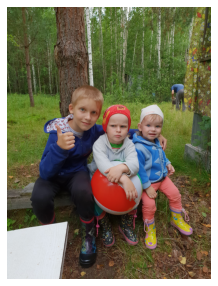

In [4]:
fpath='../../test_images/20180720_174416.jpg'
frame_bgr = cv2.imread(fpath)
plt.figure(figsize=(5, 5))
frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(frame)

bounding_boxes=detect_face(frame)

Happiness [-2.9808848   4.2635717  -3.640364   -2.56185     4.7772274   2.3287745
 -0.79384005 -1.3838015 ]
Anger [ 6.18893    -1.1072468   0.94310445  1.3878762  -5.256686    0.5926723
  3.6071162  -2.4092174 ]
Fear [-2.5567782 -1.0862386  0.3354936  3.0402284  1.4819769 -0.0133701
  0.419299   2.0756946]


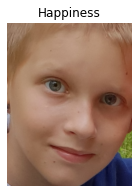

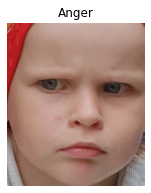

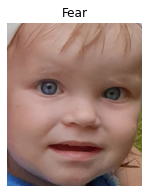

In [9]:
for bbox in bounding_boxes:
    box = bbox.astype(int)
    x1,y1,x2,y2=box[0:4]    
    face_img=frame[y1:y2,x1:x2,:]
    emotion,scores=fer.predict_emotions(face_img,logits=True)
    print(emotion,scores)
    
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(face_img)
    plt.title(emotion)

['Happiness', 'Anger', 'Fear'] [[2.5252730e-04 3.5361910e-01 1.3058707e-04 3.8396590e-04 5.9103543e-01
  5.1081538e-02 2.2497266e-03 1.2471327e-03]
 [9.1431719e-01 6.2002259e-04 4.8179659e-03 7.5166719e-03 9.7797802e-06
  3.3936966e-03 6.9155931e-02 1.6864324e-04]
 [2.0624457e-03 8.9749061e-03 3.7194632e-02 5.5607283e-01 1.1705547e-01
  2.6240418e-02 4.0446095e-02 2.1195321e-01]]


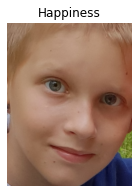

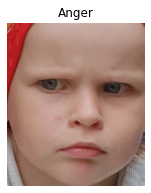

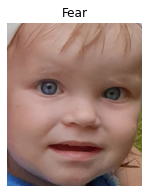

In [10]:
face_img_list=[]
for bbox in bounding_boxes:
    box = bbox.astype(int)
    x1,y1,x2,y2=box[0:4]    
    face_img=frame[y1:y2,x1:x2,:]
    face_img_list.append(face_img)

emotions,scores=fer.predict_multi_emotions(face_img_list,logits=False)
print(emotions,scores)

for face_img,emotion in zip(face_img_list,emotions):    
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(face_img)
    plt.title(emotion)